# Lab 5 Report

Simon Chen & Shih-Ming Lin & Cynthia Li

In [8]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa

## Summary

This lab aims to familiarize with converting signals from the time domain to the frequency domain and try to identify the frequencies of e^(jwt) containing periodic signals. In assignments, we learned to find the Fourier series coefficients and frequency components of the signal, and their relationship. And finally, we decode a phone number from a .csv file.

## Assignment 1 -- Identifying Constituent Frequencies of a Signal

[ 666 1334]
-1336.0 1336.0


(-4.71238898038469, 4.71238898038469)

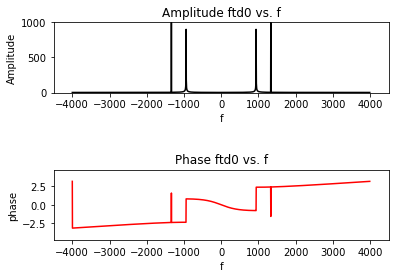

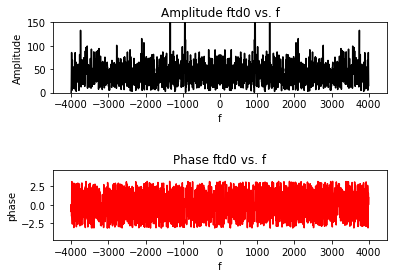

In [13]:
# Assignment 1 - Identifying Constituent Frequencies of a Signal

# Part A
fs = 8000
t = np.arange(0, 0.25, 1/fs)
d0 = np.sin(2 * np.pi * 941 * t) + np.sin(2 * np.pi * 1336 * t)

# Part B
pause = np.zeros(int(0.5 * fs)) # create a 0.5-sec pause
s_f = 10000
audio_d0 = np.concatenate([d0 * s_f, pause, d0 * s_f])
audio_d0= audio_d0.astype('int16')
sa.play_buffer(audio_d0, 1, 2, fs).wait_done()

# Part C
ftd0 = np.fft.fftshift(np.fft.fft(d0))
df = fs / len(d0)
f = np.arange(-fs/2, fs/2, df)

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1.1, wspace = 0.5)

plt.subplot(2,1,1)
plt.plot(f, np.abs(ftd0), 'k-')
plt.title('Amplitude ftd0 vs. f')
plt.xlabel('f')
plt.ylabel('Amplitude')
plt.xlim(-4500, 4500)
plt.ylim(0, 1000)

plt.subplot(2,1,2)
plt.plot(f, np.angle(ftd0), 'r-')
plt.title('Phase ftd0 vs. f')
plt.xlabel('f')
plt.ylabel('phase')
plt.xlim(-4500, 4500)
plt.ylim(-1.5 * np.pi, 1.5 * np.pi)

# Part D
ind = np.arange(len(ftd0))
a = np.abs(ftd0)
i = ind[a[ind] > 900]

print(i) # 941 not shown as the index 765 and 1235(rounded) contains value 899.96..., slightly less than 900
f1 = -4000 + 666 * df # f of peak in Hz
f2 = -4000 + 1334 * df # f of peak in Hz
print (f1, f2)

# Part E
n = np.random.normal(0,1,len(d0))
d0n = n + d0

ftd0n = np.fft.fftshift(np.fft.fft(d0n))
df2 = fs / len(d0n)

fig1 = plt.figure(2)
fig1.subplots_adjust(hspace = 1.1, wspace = 0.5)

plt.subplot(2,1,1)
plt.plot(f, np.abs(ftd0n), 'k-')
plt.title('Amplitude ftd0 vs. f')
plt.xlabel('f')
plt.ylabel('Amplitude')
plt.xlim(-4500, 4500)
plt.ylim(0, 150)

plt.subplot(2,1,2)
plt.plot(f, np.angle(ftd0n), 'r-')
plt.title('Phase ftd0 vs. f')
plt.xlabel('f')
plt.ylabel('phase')
plt.xlim(-4500, 4500)
plt.ylim(-1.5 * np.pi, 1.5 * np.pi)

###  Discussion

1. A threshold of 100 is a bit too small to extract the actual peak of the original signal as some spikes in the noise would also be kept.

2. Lowering the threshold can identify more frequencies. In fact, the threshold of 900 might be a bit too high as it also excludes frequency of 941 Hz in the original signal. Thus, reasonably lowering the threshold can help capture more frequencies in ftd0.

3. After adding the noise, the amplitude vs. f plot would have intense spikes in the lower amplitude range (mainly in 0-100) across all f, and the phase vs. f plot would have intense spikes for phase -pi to pi across all f.

4. Nothing would change except it would have a new peak at f = 0 (in amplitude) as well.

## Assignment 2 -- Amplitude Operations on Signals

In [14]:
# Assignment 2 - Classifying Touch-Tone Telephone Signals

# Part A
def classify(x, fs):
    row, col = (10, 2)
    tone_freqs = [[0] * col] * row
    tone_freqs[0] = [941, 1336]
    tone_freqs[1] = [697, 1209]
    tone_freqs[2] = [697, 1336]
    tone_freqs[3] = [697, 1477]
    tone_freqs[4] = [770, 1209]
    tone_freqs[5] = [770, 1336]
    tone_freqs[6] = [770, 1477]
    tone_freqs[7] = [852, 1209]
    tone_freqs[8] = [852, 1336]
    tone_freqs[9] = [852, 1477]

    nfft = 4096
    ftx = np.fft.fftshift(np.fft.fft(x, nfft))
    df2 = fs / nfft
    f2 = np.arange(-fs/2, fs/2, df2)
    
    ind = np.arange(len(ftx))
    xfft_abs = np.abs(ftx)
    index_tone = ind[xfft_abs[ind] > 900]
    freq_tone = -fs/2 + index_tone * df2
    pos_freq = np.rint(np.array([freq_tone[2], freq_tone[3]]))
    
    print(pos_freq)
    
    min_e = (941 - pos_freq[0]) * (941 - pos_freq[0]) + (1336 - pos_freq[1]) * (1336 - pos_freq[1])
    digit = 0
    
    for i in range(10):
        d_e = (tone_freqs[i][0] - pos_freq[0]) ** 2 + (tone_freqs[i][1] - pos_freq[1]) ** 2
        if (d_e < min_e):
            min_e = d_e
            digit = i
    return digit

In [15]:
#Part B
fs = 8000
t = np.arange(0, 0.25, 1/fs)

d4 = np.sin(2 * np.pi * 770 * t) + np.sin(2 * np.pi * 1209 * t)
d5 = np.sin(2 * np.pi * 770 * t) + np.sin(2 * np.pi * 1336 * t)
d8 = np.sin(2 * np.pi * 852 * t) + np.sin(2 * np.pi * 1336 * t)
d9 = np.sin(2 * np.pi * 852 * t) + np.sin(2 * np.pi * 1477 * t)

print(classify(d4, fs))
print(classify(d5, fs))
print(classify(d8, fs))
print(classify(d9, fs))

[ 770. 1209.]
4
[ 770. 1336.]
5
[ 852. 1336.]
8
[ 852. 1477.]
9


###  Discussion

1. Since as shown in assignment 1, the noise mainly have relatively low magnitude (lower than 200), thus, we want to use an appropriate threshold to extract the peak of the real signal. Like in Assignment 1, threshold of 800 would be good enough to catch the pitch of the real signal.
2. According to Nyquist's sampling theorem,a bandlimited continuous time signal can be sampled and perfectly reconstructed from its samples if the waveform is sampled over twice as fast as it's highest frequency component.So, f_max must be less than fs/2 to accurately represent the sampling rate up to f_max.

## Assignment 3 -- Decoding a Phone Number from Touch-Tone Signals

In [16]:
# Assignment 3 Decoding a Phone Number from Touch-Tone Signals

# Part A
file = open('phonenum.csv','rb')
phonenum = np.loadtxt(file, delimiter = ',')

# Part B
fs = 8000
phone_num = [-1] * 11

# Part C
for x in range(11):
    start = 0 + 4000 * (x) 
    end = 4000 * (x+1)
    f = phonenum[start:end]
    phone_num[x] = classify(f, fs)
    
# Part D
for i in range(len(phone_num)):
    print(phone_num[i], end='')

[ 697. 1209.]
[ 852. 1336.]
[ 941. 1336.]
[ 941. 1336.]
[ 852. 1209.]
[ 852. 1336.]
[ 770. 1477.]
[ 697. 1209.]
[ 941. 1336.]
[ 941. 1336.]
[ 941. 1336.]
18007861000

### Discussion
The decoded message is 18007861000 and the corresponding restaurant is In-N-Out Burger (Mount View, CA).
